In [19]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
import sys

## Task 2.1 

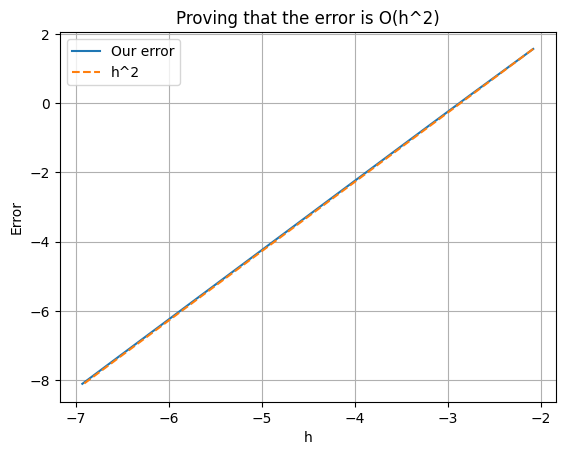

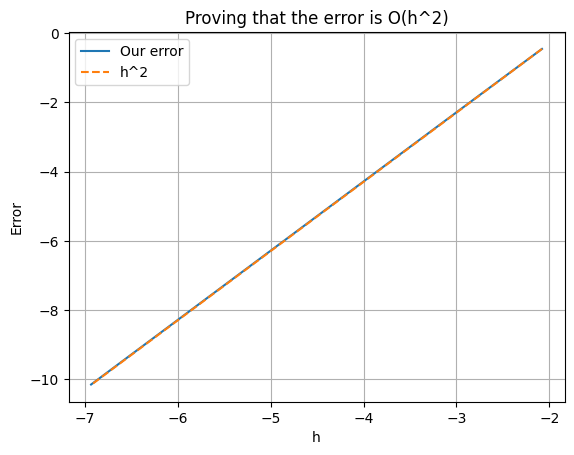

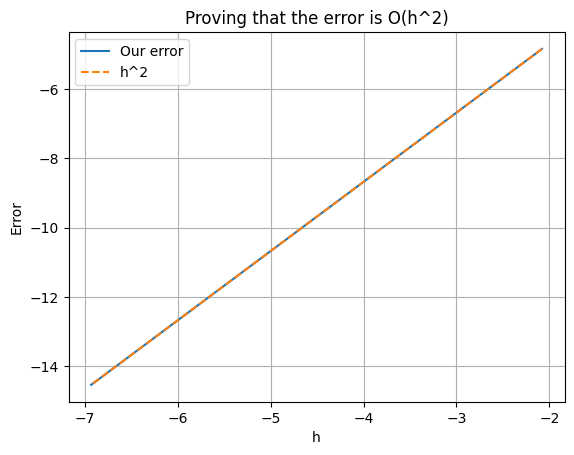

In [20]:
Nvec = np.linspace(3,10,7).astype(int)   
Nvec = 2**Nvec #Skapar en lista med massor med N. 
errorvec=[[],[],[]] #Skapar en lista som innehåller felen
hvec = 1/Nvec #Skapar en lista med steglängden.

for N in Nvec:
    first_row = np.zeros(N)
    first_row[:2] = [-2, 1]
    T = la.toeplitz(first_row)
    T[N-1,N-2] = 2
    T = T/((1/N)**2)  #Skapar en korrekt T-matris med Neumann-villkor 

    eig = np.array(scipy.linalg.eigvals(T)) 
    eig = np.sort(eig)
    caleig = eig[-3:] 
    trueeig = [-(math.pi*5/2)**2, -(math.pi*3/2)**2,-(math.pi*1/2)**2 ]  #Beräknar de sanna egenvärdena 

    for i in range(len(errorvec)):
         errorvec[i].append(np.abs(caleig[i]-trueeig[i]))  #Plonkar in absolutbeloppet på felet i errorvec 

for i in range(3): #Plottar felet i loglog skala mot steglängden. 
    plt.plot(np.log(hvec), np.log(errorvec[i]))
    plt.plot(np.log(hvec), 2*np.log(hvec) + np.log(errorvec[i][0])-2*np.log(hvec[0]), '--')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.legend(['Our error', 'h^2'])
    plt.title('Proving that the error is O(h^2)')
    plt.grid()
    plt.show()



This belongs to value(-2.4673990629209333+0j)


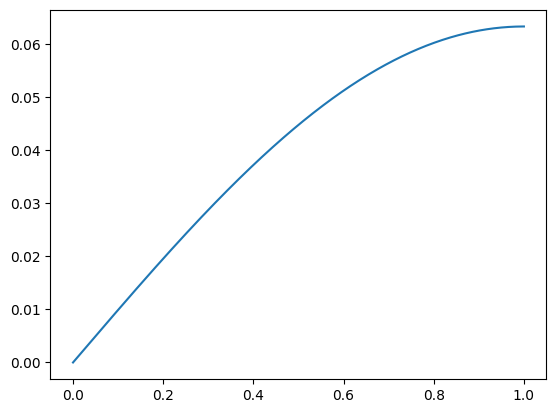

This belongs to value(-22.206444865777218+0j)


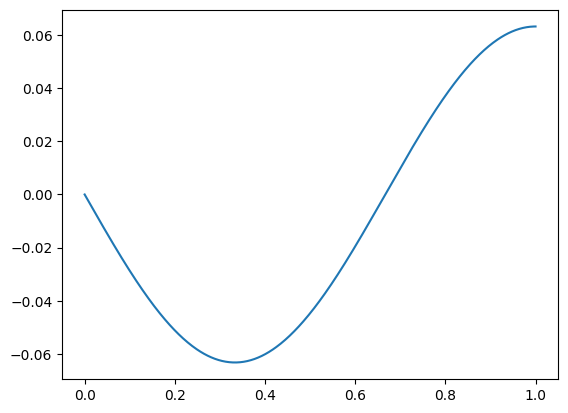

This belongs to value(-61.68375408123293+0j)


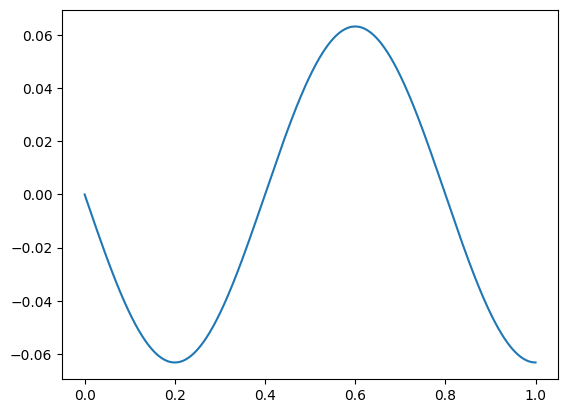

In [21]:
N = 499
Xgrid = np.linspace(0,1,N+1)

first_row = np.zeros(N)
first_row[:2] = [-2, 1]
T = la.toeplitz(first_row)
T[N-1,N-2] = 2
T = T/((1/N)**2)

eigvals, eigvectors = scipy.linalg.eig(T)
eig_dict = {eigvals[i]: np.insert(eigvectors[:,i],0,0) for i in range(len(eigvals))}

eigvals = np.sort(eigvals)[::-1]
for i in range(3):  
    plt.plot(Xgrid, (eig_dict[eigvals[i]]))
    print('This belongs to value' + str(eigvals[i]))
    plt.show()
    



In [39]:
def V1(x):
    #return 0
    return 700*(0.5-np.abs(x-0.5))

def V2(x):
    return 800*np.sin(math.pi*x)**2

This belongs to value(-250.1522165569784+0j)


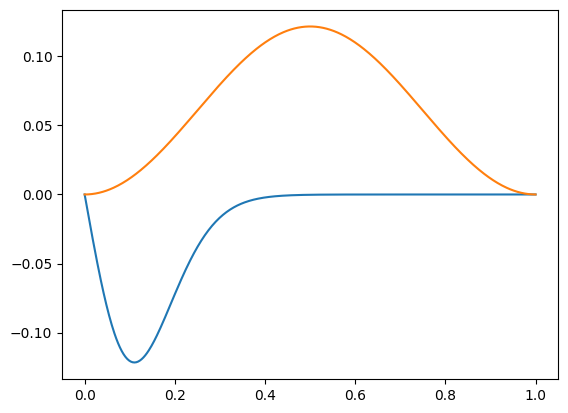

probability


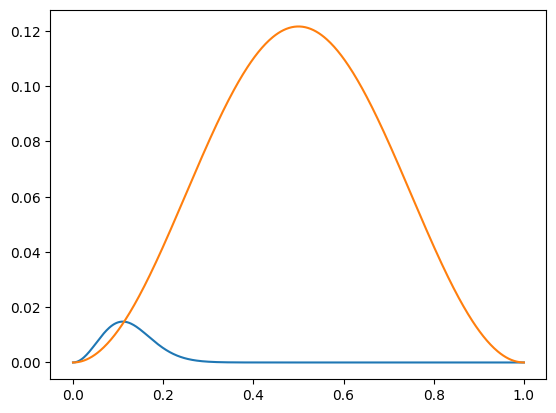

This belongs to value(-253.50311888000996+0j)


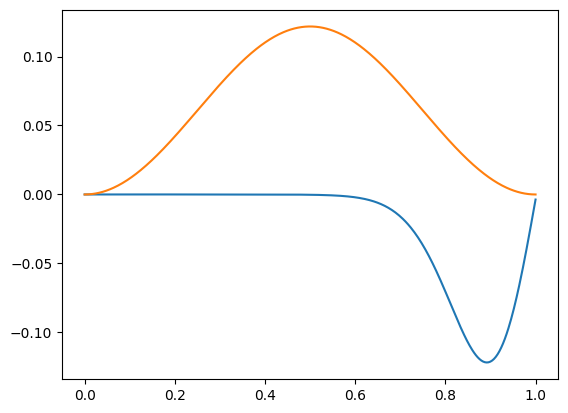

probability


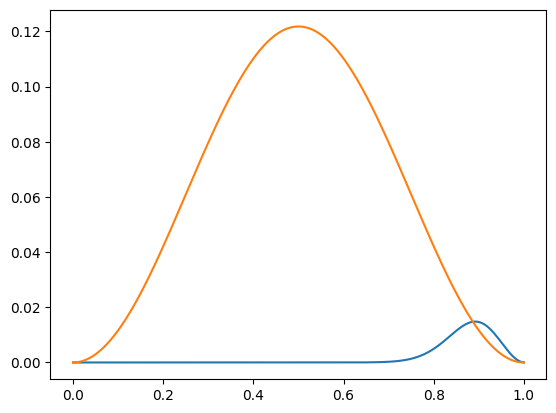

This belongs to value(-547.2518881097836+0j)


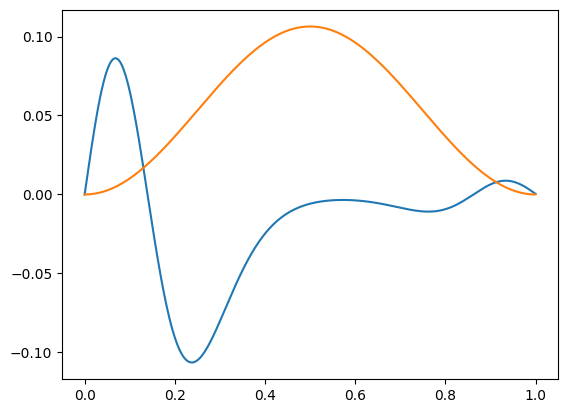

probability


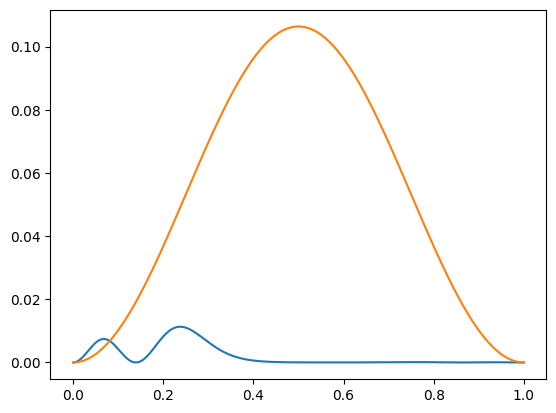

This belongs to value(-551.3929906305274+0j)


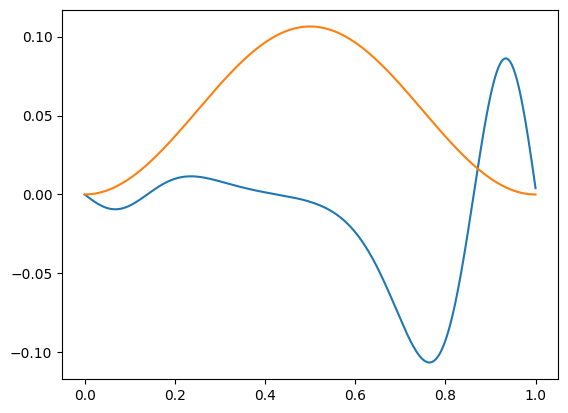

probability


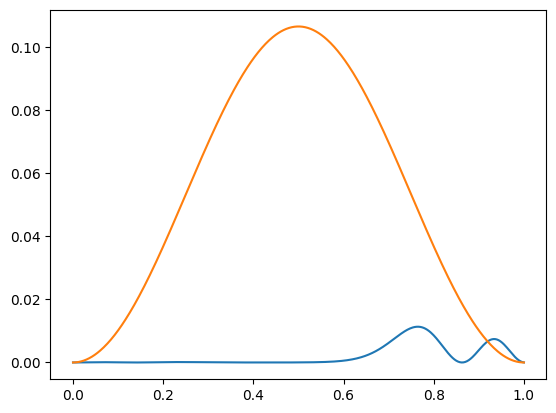

This belongs to value(-762.4046482850906+0j)


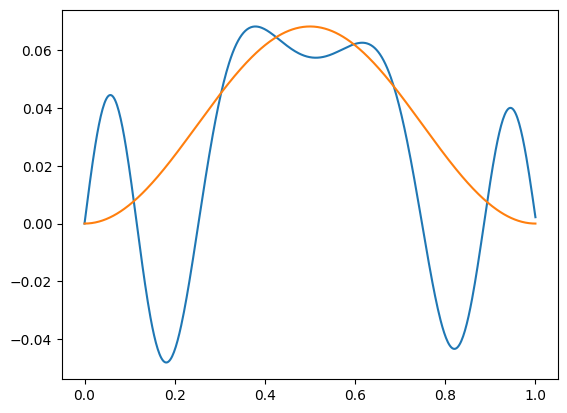

probability


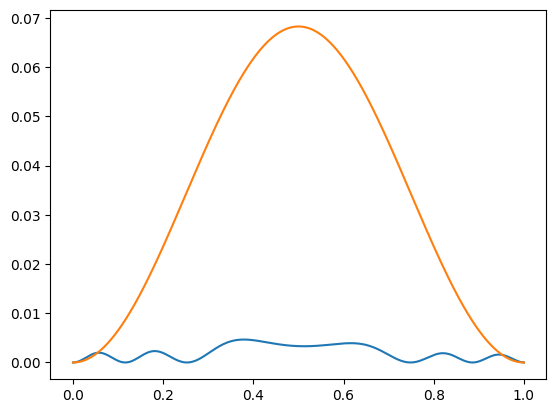

This belongs to value(-799.2009762961303+0j)


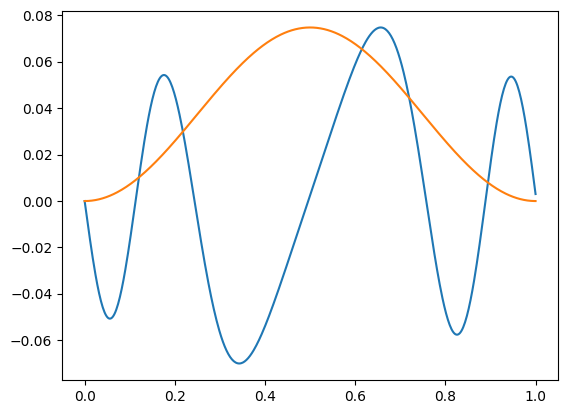

probability


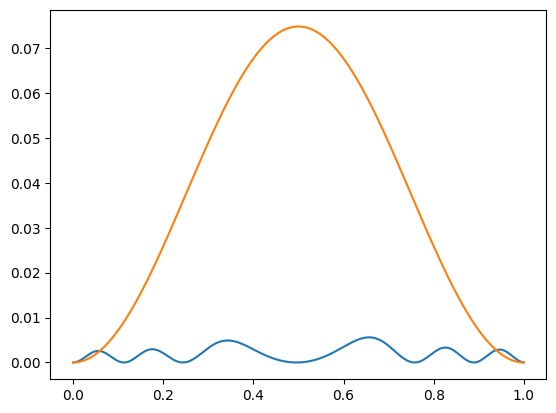

This belongs to value(-930.8613740099219+0j)


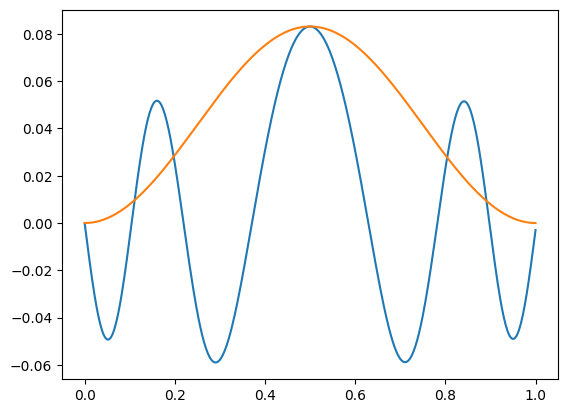

probability


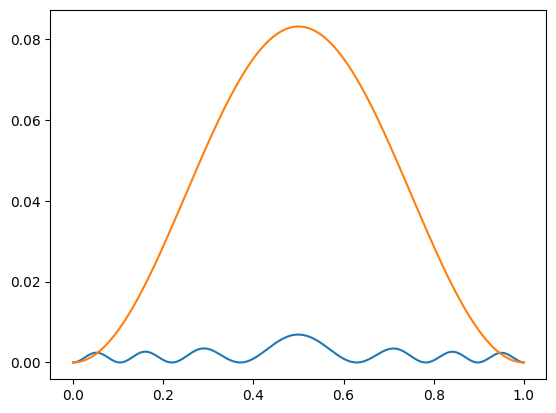

This belongs to value(-1061.3536510410918+0j)


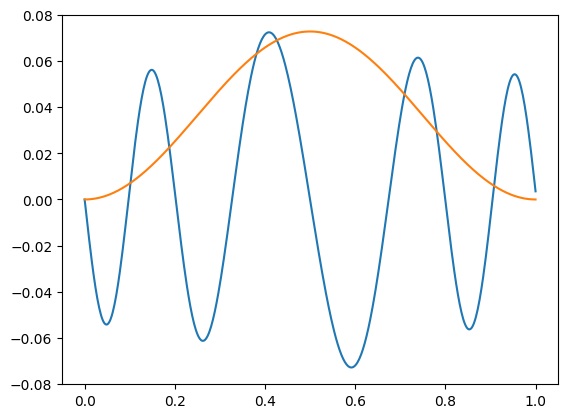

probability


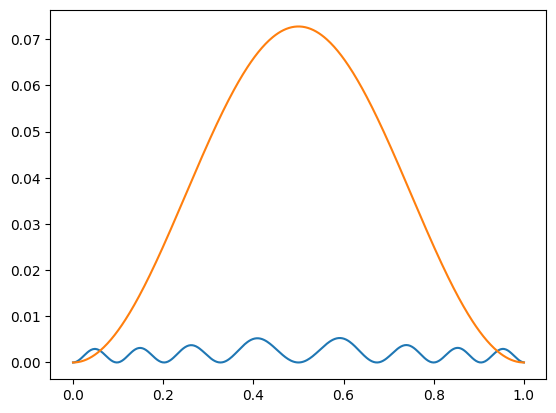

This belongs to value(-1221.3530766309516+0j)


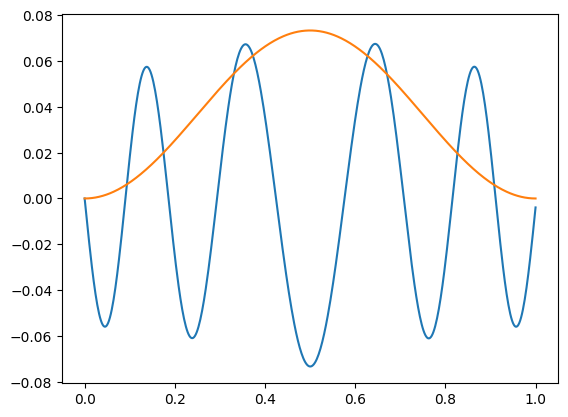

probability


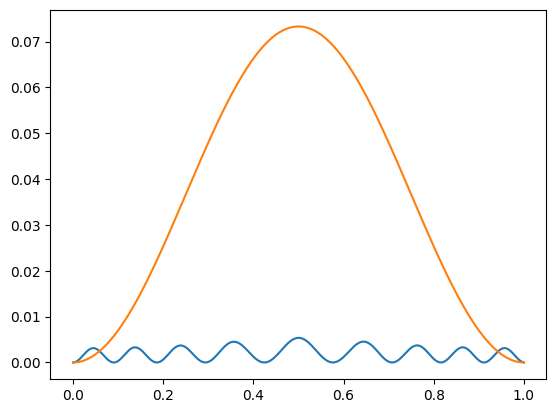

This belongs to value(-1402.774704556372+0j)


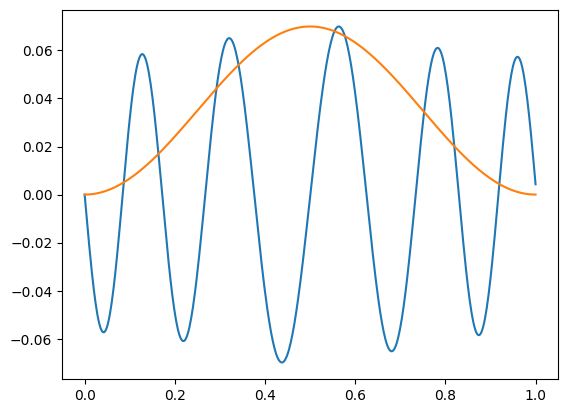

probability


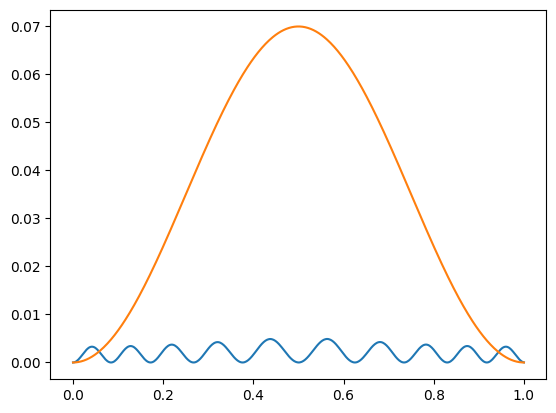

In [48]:
N = 499
V = V2
Xgrid = np.linspace(0,1,N+1)
T = np.eye(N)*(-2.0) 
for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
    T[i+1,i] = 1.0
    T[i, i+1] = 1.0

h = (1/N)
T = T/(h**2)

for i in range(N):
    T[i][i] -= V(Xgrid[i])


eigvals, eigvectors = scipy.linalg.eig(T)
eig_dict = {eigvals[i]: np.insert(eigvectors[:,i],0,0) for i in range(len(eigvals))}

eigvals = np.sort(eigvals)[::-1]
for i in range(10):  
    wavefunc = eig_dict[eigvals[i]]/np.sum(np.square(eig_dict[eigvals[i]]))
    Vplot = V(Xgrid)/np.max(V(Xgrid))*np.max(np.abs(wavefunc))
    plt.plot(Xgrid, wavefunc)
    print('This belongs to value' + str(eigvals[i]))
    plt.plot(Xgrid, Vplot)
    plt.show()
    print('probability')
    plt.plot(Xgrid, np.square(wavefunc))
    plt.plot(Xgrid, Vplot)
    plt.show()

In [38]:
a = np.array([1,2])
V1(a)

array([   0., -700.])